# **Project 4**, APS1070 Summer 2022

## **Linear Regression**

## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [ ]:
### YOUR CODE HERE ###

df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [ ]:
print(df.shape)

(13750, 41)


In [ ]:
X = df.drop(['Goal'], axis=1)
y = df['Goal']

print(X.shape, y.shape)

(13750, 40) (13750,)


In [ ]:
#Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=1) #as remaining dataset is only 85% in size, but we need 15% of the original dataset fo validation

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(9624, 40) (2063, 40) (2063, 40)
(9624,) (2063,) (2063,)


In [ ]:
y_train = np.array(y_train).reshape(-1,1)
y_val = np.array(y_val).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

print(y_train.shape, y_val.shape, y_test.shape)

(9624, 1) (2063, 1) (2063, 1)


In [ ]:
#Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = scaler.fit(X_train)  #scaler should be fit only on training data

X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [ ]:
#Inserting column of 1s in train, validation and test data

X_train_normalized = np.hstack((np.ones((X_train_normalized.shape[0],1)), X_train_normalized))

X_val_normalized = np.hstack((np.ones((X_val_normalized.shape[0],1)), X_val_normalized))

X_test_normalized = np.hstack((np.ones((X_test_normalized.shape[0],1)), X_test_normalized))

print(X_train_normalized.shape, X_val_normalized.shape, X_test_normalized.shape)

(9624, 41) (2063, 41) (2063, 41)


**Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? [0.5]**

An epoch is when an algorithm sees the whole training dataset.
An iteration is when an algorithm is applied to a batch in the dataset.

Full Batch Gradient Descent: Here, the entire training dataset is considered as a batch. 1 epoch = 1 iteration.

Mini-Batch Gradient Descent: Here, the training dataset is broken into smaller batches of size=batch_size. 1 epoch consists of iterations = number of batches =(dataset_size//batch_size + dataset_size%batch_size).

Stochastic Gradient Descent (SGD): Here, each data sample is considered as an individual batch (ie. batch_size=1). 1 epoch consists of iterations = dataset size.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
### YOUR CODE HERE ###

from scipy import linalg

from sklearn.metrics import mean_squared_error

#Direct solution of the linear regression proble,
W = np.dot(linalg.inv(np.dot(X_train_normalized.T, X_train_normalized)), np.dot(X_train_normalized.T, y_train)) # Train the model using training set: finding weights
y_pred_train = np.dot(X_train_normalized, W) # prediction on the training set
y_pred_val = np.dot(X_val_normalized, W)

#RMSE for train and validation sets
rmse_train_direct = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val_direct = np.sqrt(mean_squared_error(y_val, y_pred_val))

print("RMSE for training set =",rmse_train_direct)
print("RMSE for validation set =",rmse_val_direct)

RMSE for training set = 0.0005663942686278687
RMSE for validation set = 0.0005485775858757549


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [ ]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##

#w = (np.random.random(41)).reshape(1,-1) ### Inital weights
w = (np.random.random(41)/1000).reshape(1,-1) #random.random() creates random number between [0,1) and dividing by 1000 to reduce it to between [0,0.001) 

lr = .01  ### Learning rate
rmse_array_train=[]
rmse_array_val=[]

while True: 
  
  y_pred_train = np.dot(X_train_normalized, w.T).reshape(-1,1)
  
  gradient = (1/len(y_pred_train) * np.dot(X_train_normalized.T, y_pred_train-y_train)).reshape(1,-1)
  w = w - lr * gradient

  y_pred_train = np.dot(X_train_normalized, w.T).reshape(-1,1)
  y_pred_val = np.dot(X_val_normalized, w.T).reshape(-1,1)

  rmse_array_train.append(np.sqrt(mean_squared_error(y_pred_train,y_train)))
  rmse_array_val.append(np.sqrt(mean_squared_error(y_pred_val,y_val)))

  if (rmse_array_val[-1] <= 1.001*rmse_val_direct):
      break


print("Total Training Time: %s (s)" % (time.time() - start_time))
print("Number of epochs to convergence =",len(rmse_array_train))

print("Training RMSE =",rmse_array_train[-1])
print("Validation RMSE =",rmse_array_val[-1])

Total Training Time: 0.29001545906066895 (s)
Number of epochs to convergence = 164
Training RMSE = 0.000691732943520447
Validation RMSE = 0.000546859149290082


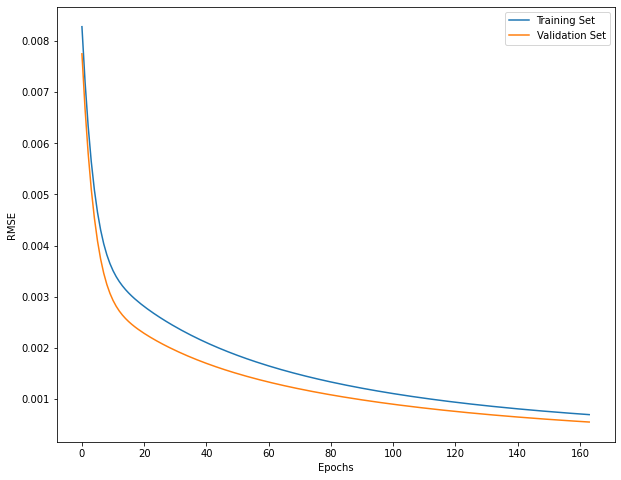

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(rmse_array_train, label = "Training Set")
plt.plot(rmse_array_val, label = "Validation Set")
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Comment on overfitting/underfitting by observing the training and validation RMSE [1]**

Based on the Training and Validation curves, the model is neither overfit or underfit. At the beginning, for a very small number of epochs, the model is underfit, as the RMSE is high for both training and validation sets, implying that the model has room for improvement. As the number of epochs increases, RMSE decreases and converges to the specified value. At no point in the training is the validation RMSE significantly higher than the training RMSE, hance the model is not overfit anywhere. At the convergence, the model is neither underfit nor overfit.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

#### **Condition for Divergence:**
Minibatch gradient descent is not as smooth as full batch gradient descent. Thus, the RMSE might slightly increase for an epoch, and we can allow this. But if it keeps increasing epoch after epoch, we consider it as diverging and stop training.

We call the function mini_batch_gd as diverging (for a specific batch_size), if either of the following 2 conditions are met:

1.   Validation RMSE continually increases for 5 epochs (starting at epochs > 10)
2.   Validation RMSE is greater than what it was at the beginning (starting at epochs > 10)



In [ ]:
### YOUR CODE HERE ###

def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, lr, ct):

    start_time = time.time()  #Start of training

    w = (np.random.random(X_train.shape[1])/1000).reshape(1,-1) #random.random() creates random number between [0,1) and dividing by 1000 to make it between [0,0.001) 

    rmse_array_train=[]
    rmse_array_val=[]

    iter = X_train.shape[0]//batch_size + ((X_train.shape[0]%batch_size) > 0) # 1 additional iteration if X_train number of samples is not perfectly divisible by batch_size

    w = (np.random.random(41)/1000).reshape(1,-1)

    time_epochs = []

    epochs = 0

    while True:

        epochs += 1

        X_train_mini = []
        y_train_mini = []

        X_train = np.random.permutation(X_train)
        y_train = np.random.permutation(y_train)


        for i in range(X_train.shape[0]//batch_size): #Upto highest multiple of batch_size
            X_train_mini.append(X_train[i*batch_size : (i+1)*batch_size])
            y_train_mini.append(y_train[i*batch_size : (i+1)*batch_size])


        if ((X_train.shape[0]%batch_size) > 0): #remaining samples
            X_train_mini.append(X_train[(iter-1)*batch_size :])
            y_train_mini.append(y_train[(iter-1)*batch_size :])


        for i in range(iter):

            y_pred_train = np.dot(X_train_mini[i], w.T).reshape(-1,1)

            gradient = (1/len(y_pred_train) * np.dot(X_train_mini[i].T, y_pred_train-y_train_mini[i])).reshape(1,-1)
            w = w - lr * gradient #weight update


        y_pred_train = np.dot(X_train, w.T).reshape(-1,1)
        y_pred_val = np.dot(X_val, w.T).reshape(-1,1)

        rmse_array_train.append(np.sqrt(mean_squared_error(y_pred_train,y_train)))  #train RMSE after an epoch
        rmse_array_val.append(np.sqrt(mean_squared_error(y_pred_val,y_val)))  #validation RMSE after an epoch

        time_epochs.append(time.time() - start_time)  #End of an epoch

        if(rmse_array_val[-1] <= ct):
            break


        #Check for divergence

        if (epochs > 10):
            if ((rmse_array_val[-1] > rmse_array_val[-2]) and (rmse_array_val[-2] > rmse_array_val[-3]) and (rmse_array_val[-3] > rmse_array_val[-4]) and (rmse_array_val[-4] > rmse_array_val[-5]) and (rmse_array_val[-5] > rmse_array_val[-6])):
                break
            if (rmse_array_val[-1] > rmse_array_val[0]):
                break


    return w, rmse_array_train, rmse_array_val, time_epochs

Diverged for batch size = 1
Diverged for batch size = 2
Diverged for batch size = 4
Converged for batch size = 8
Converged for batch size = 16
Converged for batch size = 32
Converged for batch size = 64


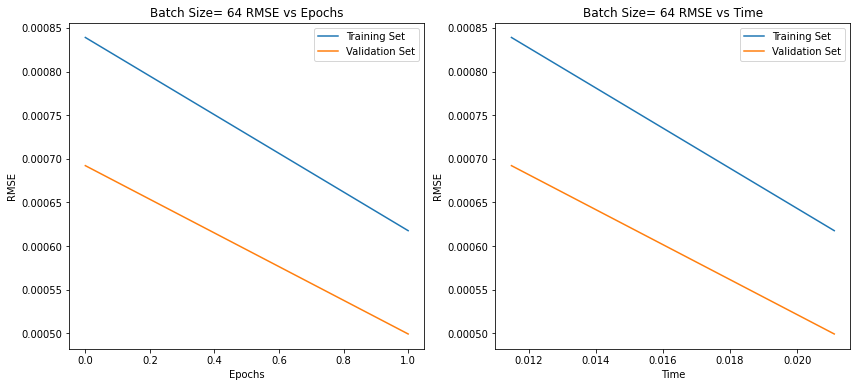

Converged for batch size = 128


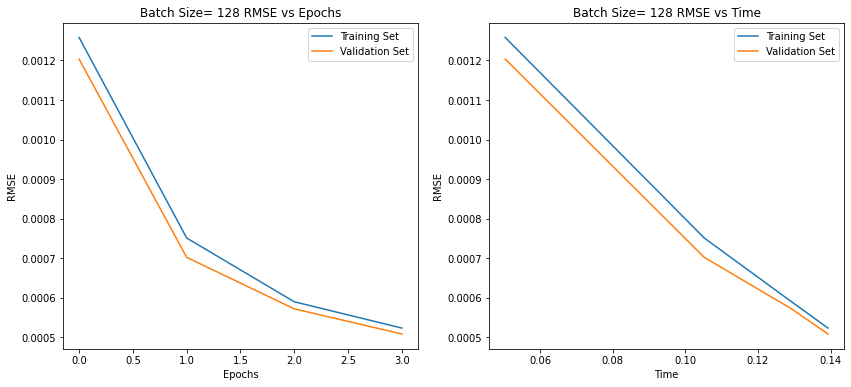

Converged for batch size = 256


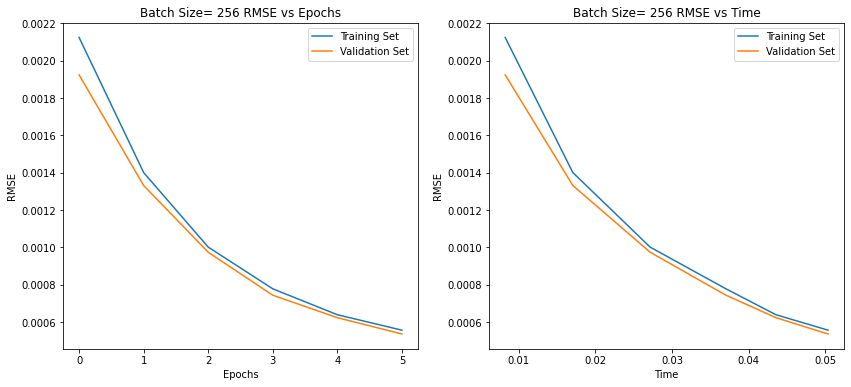

Converged for batch size = 512


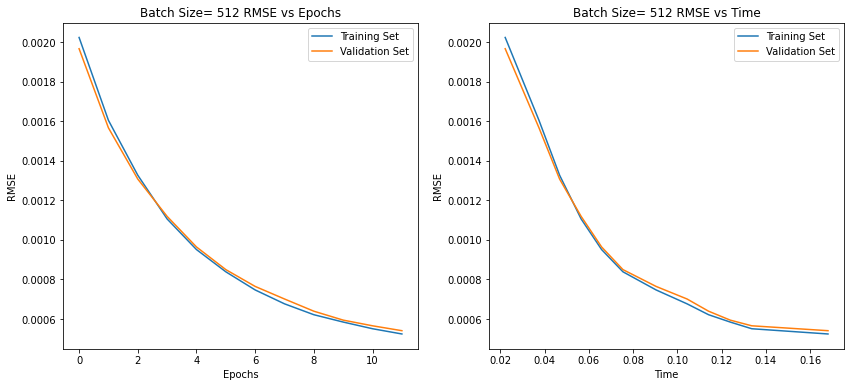

Converged for batch size = 1024


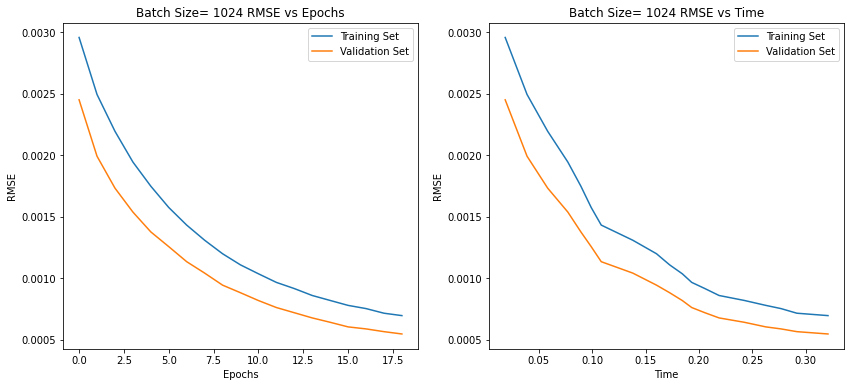

Converged for batch size = 2048


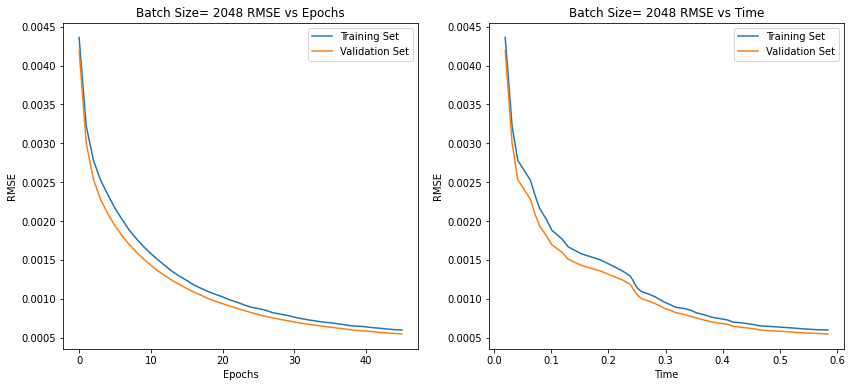

Converged for batch size = 4096


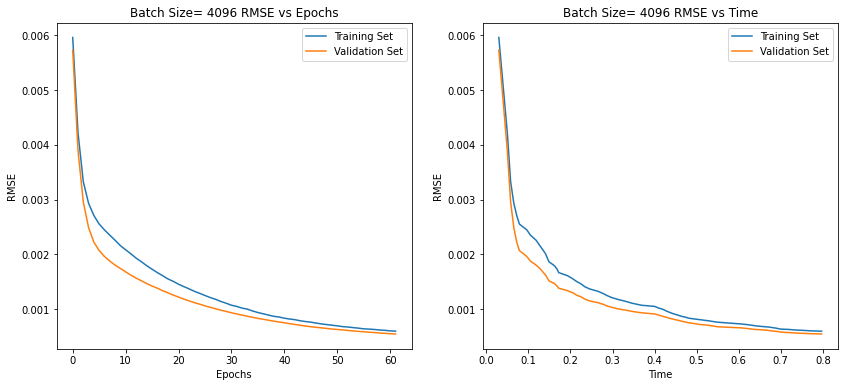

Converged for batch size = 8192


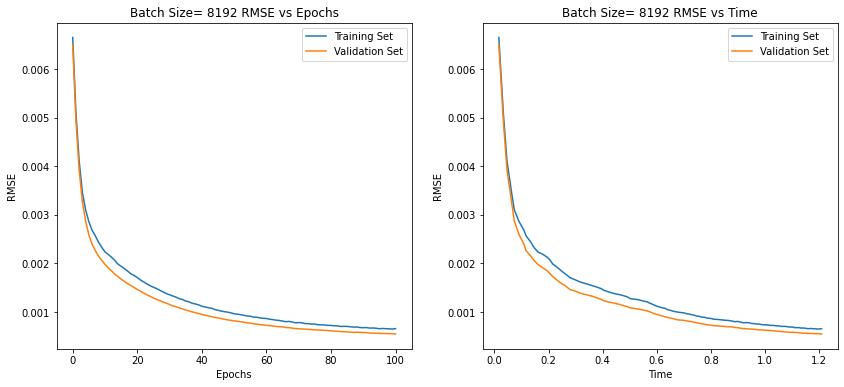

In [ ]:
training_times_batch = []
convergence_batch = []

batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

ct=1.001*rmse_val_direct

RMSE_Array_Train = []
RMSE_Array_Val = []
Time_Epochs = []

for batch_size in batch_sizes:
    
    w, rmse_array_train, rmse_array_val, time_epochs = mini_batch_gradient_descent(X_train=X_train_normalized , y_train=y_train , X_val=X_val_normalized , y_val=y_val , batch_size=batch_size , lr=0.01, ct=ct)

    converged = (rmse_array_val[-1] <= ct)  #check if converged or not

    RMSE_Array_Train.append(rmse_array_train)
    RMSE_Array_Val.append(rmse_array_val)
    Time_Epochs.append(time_epochs)

    if(converged==True):
        print("Converged for batch size =",batch_size)

        if(len(time_epochs)>1): #Not plotting for convergence in one epoch
            fig, axs = plt.subplots(1, 2, figsize=(14, 6))
            
            axs[0].plot(rmse_array_train, label = "Training Set")
            axs[0].plot(rmse_array_val, label = "Validation Set")
            axs[0].set(xlabel='Epochs', ylabel='RMSE')
            axs[0].legend()
            title = 'Batch Size= '+str(batch_size)+' RMSE vs Epochs'
            axs[0].set_title(title)

            axs[1].plot(time_epochs, rmse_array_train, label = "Training Set")
            axs[1].plot(time_epochs, rmse_array_val, label = "Validation Set")
            axs[1].set(xlabel='Time', ylabel='RMSE')
            axs[1].legend()
            title = 'Batch Size= '+str(batch_size)+' RMSE vs Time'
            axs[1].set_title(title)

            
            plt.show()
    else:
        print("Diverged for batch size =",batch_size)

    training_times_batch.append(time_epochs[-1])
    convergence_batch.append(converged)

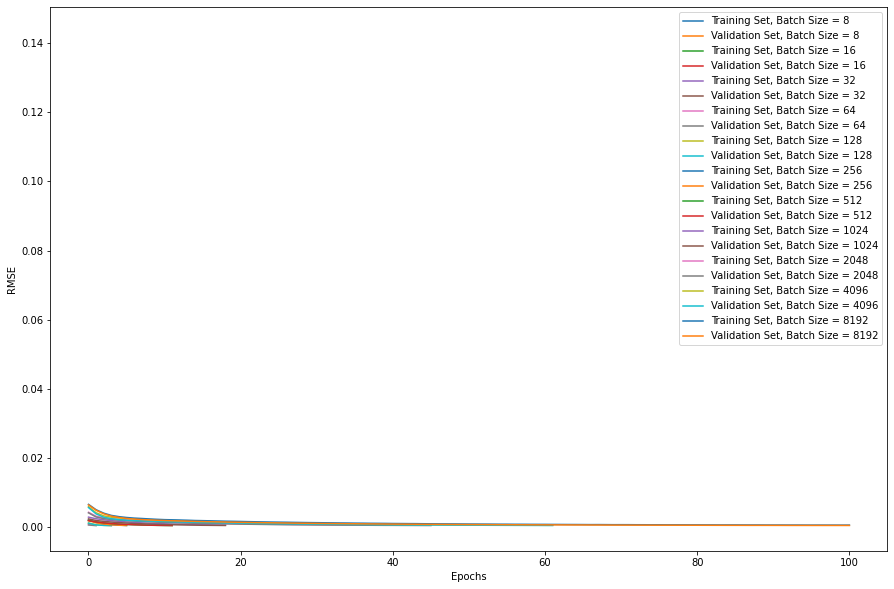

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(RMSE_Array_Train)):
    if(convergence_batch[i]==True):
        plt.plot(RMSE_Array_Train[i], label='Training Set, Batch Size = '+str(batch_sizes[i]))
        plt.plot(RMSE_Array_Val[i], label = 'Validation Set, Batch Size = '+str(batch_sizes[i]))
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

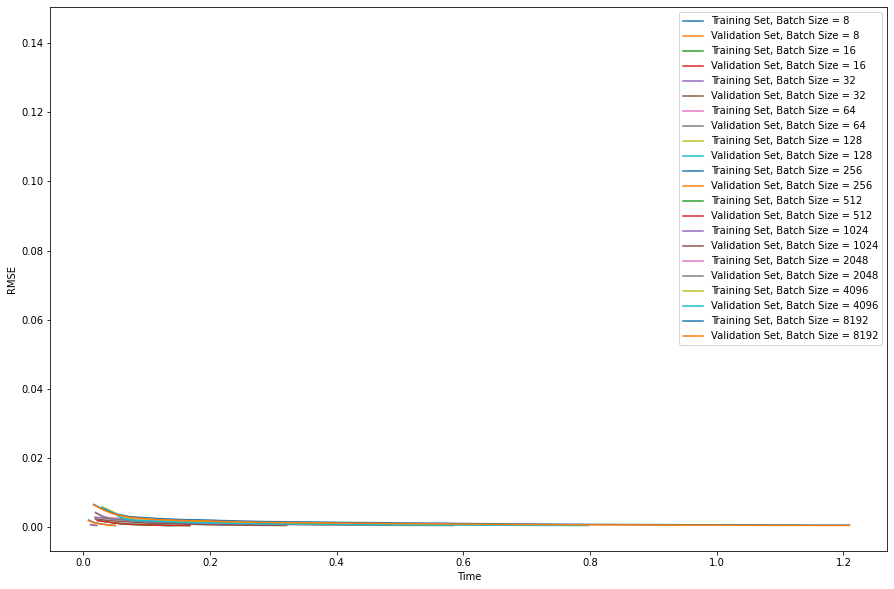

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(RMSE_Array_Train)):
    if(convergence_batch[i]==True):
        plt.plot(Time_Epochs[i],RMSE_Array_Train[i], label='Training Set, Batch Size = '+str(batch_sizes[i]))
        plt.plot(Time_Epochs[i],RMSE_Array_Val[i], label = 'Validation Set, Batch Size = '+str(batch_sizes[i]))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.legend()
plt.show()

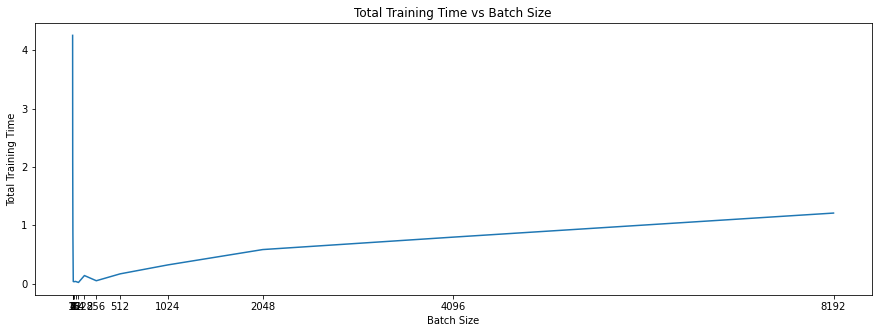

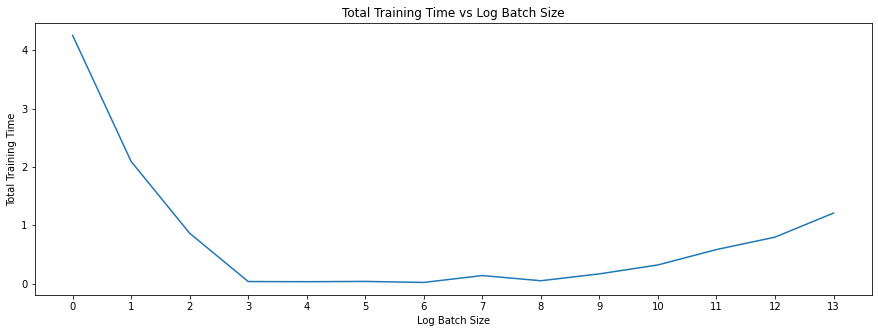

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(batch_sizes, training_times_batch)
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time')
plt.xticks(batch_sizes)
plt.title("Total Training Time vs Batch Size")
plt.show()

plt.figure(figsize=(15,5))
log_batch_sizes = np.log2(batch_sizes)
plt.plot(log_batch_sizes, training_times_batch)
plt.xlabel('Log Batch Size')
plt.ylabel('Total Training Time')
plt.xticks(log_batch_sizes)
plt.title("Total Training Time vs Log Batch Size")
plt.show()

**Describe your findings, including the main takeaways from each of your plots. [1]**

The training is stopped if RMSE values converge (<=threshold) or diverge (divergence conditions mentioned before mini_batch_gradient_descent function cell)

For very small batch sizes, the RMSE values diverge.

For intermediate batch sizes, the RMSE values converge quickly in less time and less number of epochs.

For high batch sizes, the RMSE values converge gradually, and require more number of epochs and more training time.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [ ]:
### YOUR CODE HERE ###

learning_rates = [0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0005, 0.0001]
batch_sizes = [2, 4, 8, 16]
ct=1.001*rmse_val_direct

result_values = []

for batch_size in batch_sizes:

    print("Batch Size =",batch_size)

    for lr in learning_rates:
        
        w, rmse_array_train, rmse_array_val, time_epochs = mini_batch_gradient_descent(X_train=X_train_normalized , y_train=y_train , X_val=X_val_normalized , y_val=y_val , batch_size=batch_size , lr=lr, ct=ct)

        converged = (rmse_array_val[-1] <= ct)  #check if converged or not

        if(converged==True):
            print("Converged for Learning Rate =",lr,"in",len(time_epochs),"epochs, time required =",time_epochs[-1])
            result_values.append([batch_size, lr, rmse_array_train[-1], rmse_array_val[-1]])
            break

        else:
            print("Diverged for Learning Rate =",lr)

result_values = pd.DataFrame(result_values, columns=["Batch Size","Learning Rate","Training RMSE", "Validation RMSE"])


Batch Size = 2
Diverged for Learning Rate = 0.009
Diverged for Learning Rate = 0.008
Diverged for Learning Rate = 0.007
Diverged for Learning Rate = 0.006
Diverged for Learning Rate = 0.005
Diverged for Learning Rate = 0.004
Diverged for Learning Rate = 0.003
Diverged for Learning Rate = 0.002
Converged for Learning Rate = 0.001 in 1 epochs, time required = 0.18394827842712402
Batch Size = 4
Diverged for Learning Rate = 0.009
Diverged for Learning Rate = 0.008
Diverged for Learning Rate = 0.007
Diverged for Learning Rate = 0.006
Converged for Learning Rate = 0.005 in 1 epochs, time required = 0.04703402519226074
Batch Size = 8
Diverged for Learning Rate = 0.009
Diverged for Learning Rate = 0.008
Converged for Learning Rate = 0.007 in 1 epochs, time required = 0.039542436599731445
Batch Size = 16
Converged for Learning Rate = 0.009 in 1 epochs, time required = 0.023074865341186523


In [ ]:
result_values

,Batch Size,Learning Rate,Training RMSE,Validation RMSE
0,2,0.001,0.007384,0.000543
1,4,0.005,0.017611,0.000406
2,8,0.007,0.017776,0.000411
3,16,0.009,0.009380,0.000439


**Note:** For 5.2, I have selected batch_size as the batch size which leads to convergence in least time in Part 4.

In [ ]:
min_train_time = np.Infinity
best_batch_size = -1

for i in range(14):

    if (convergence_batch[i] == True):
        if (training_times_batch[i] < min_train_time):
            min_train_time = training_times_batch[i]
            best_batch_size = 2**i

print("Best batch size based on Part 4's fastest convergence time =",best_batch_size)

Best batch size based on Part 4's fastest convergence time = 64


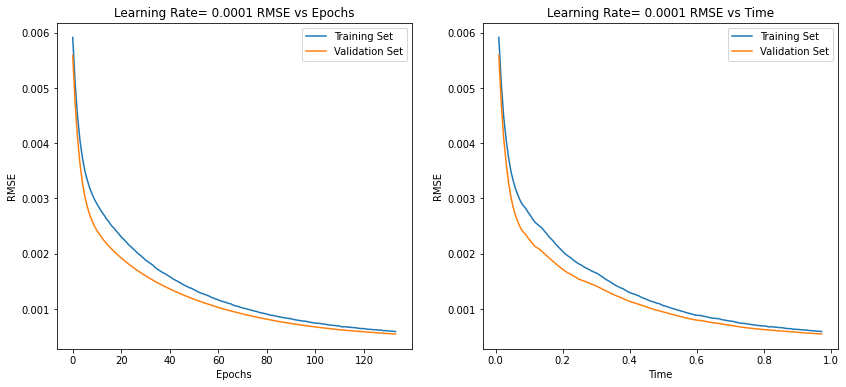

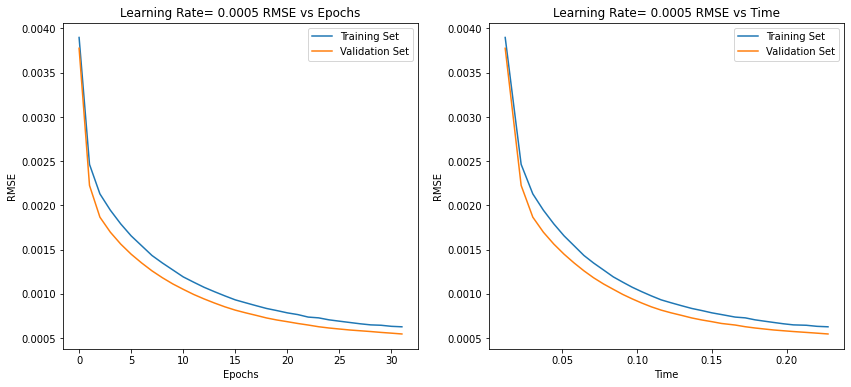

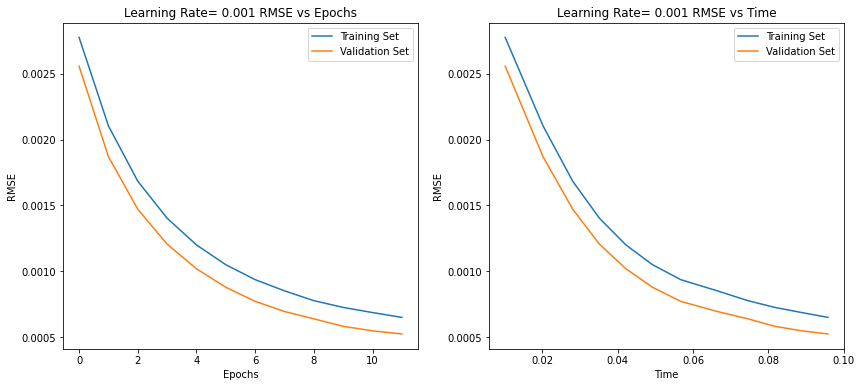

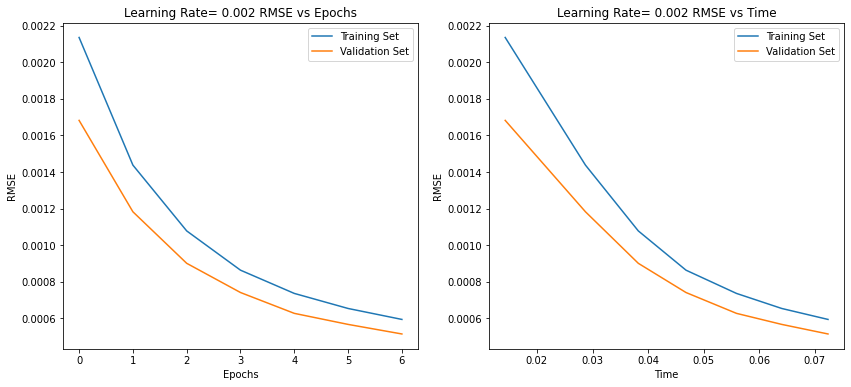

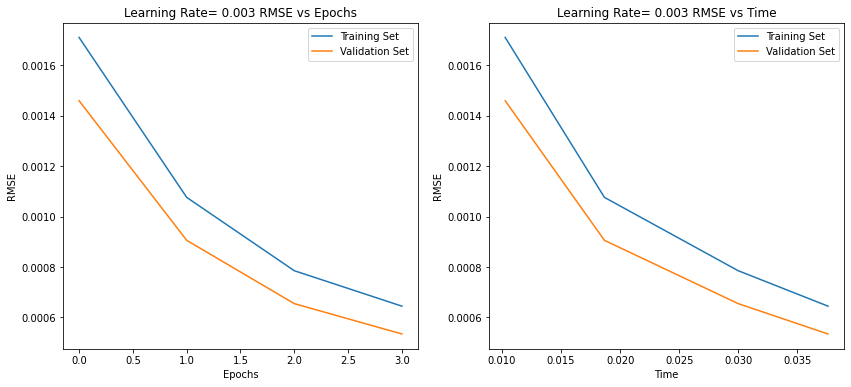

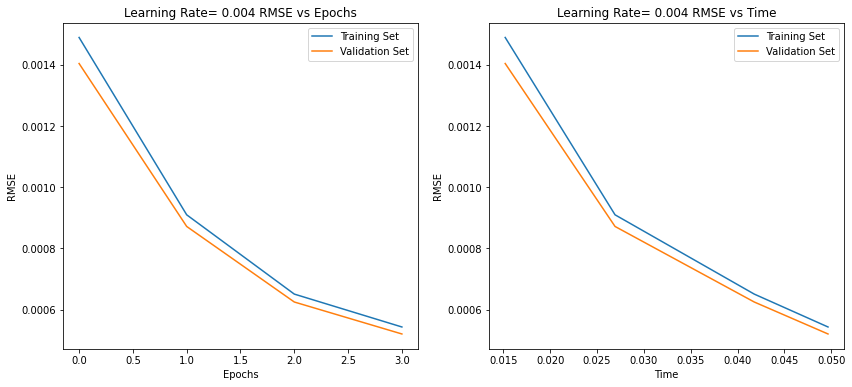

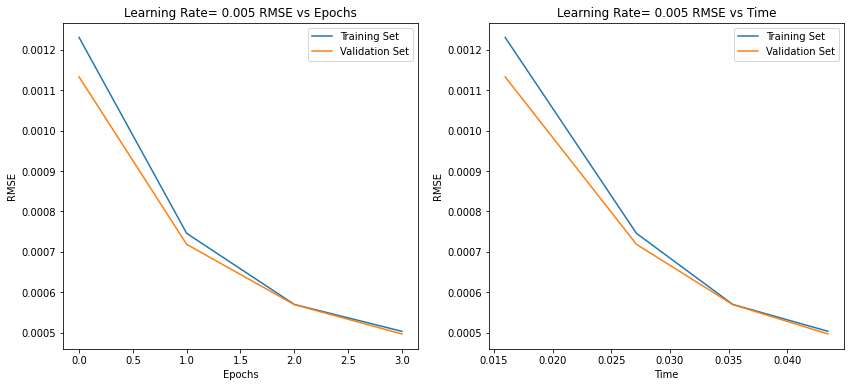

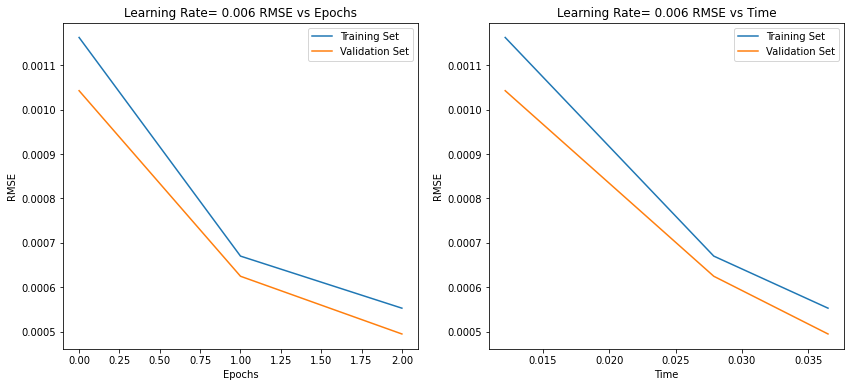

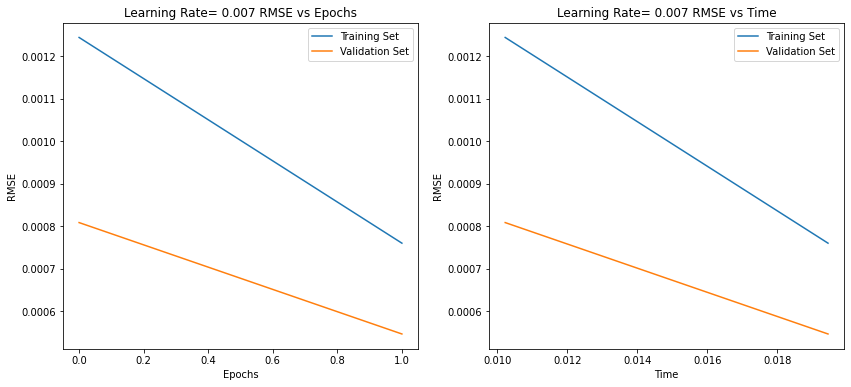

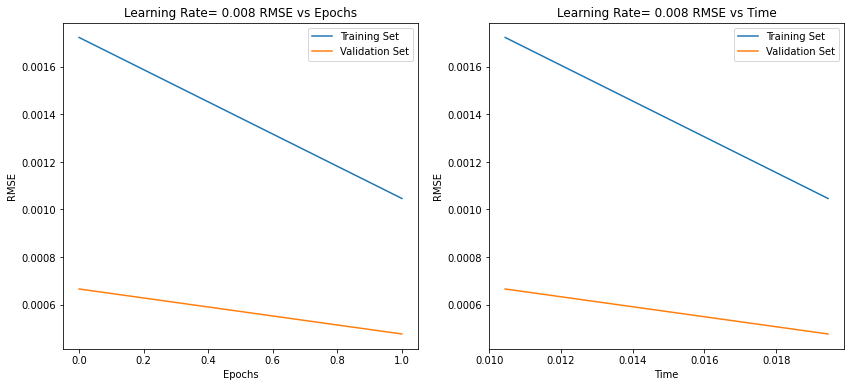

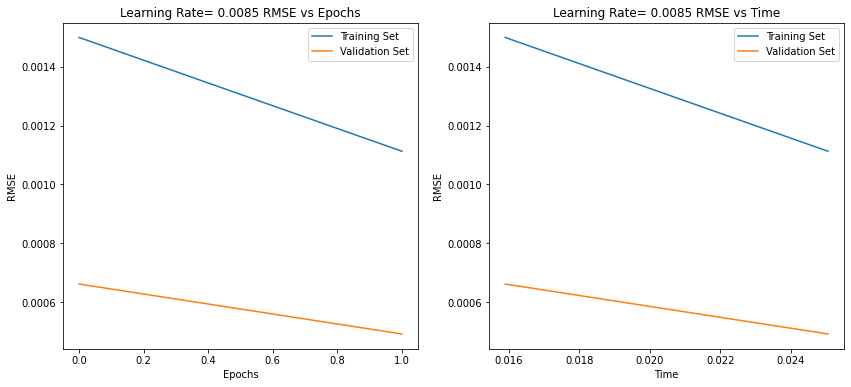

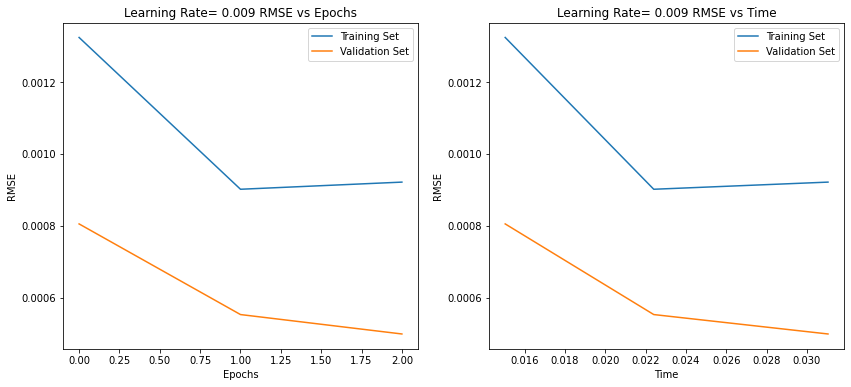

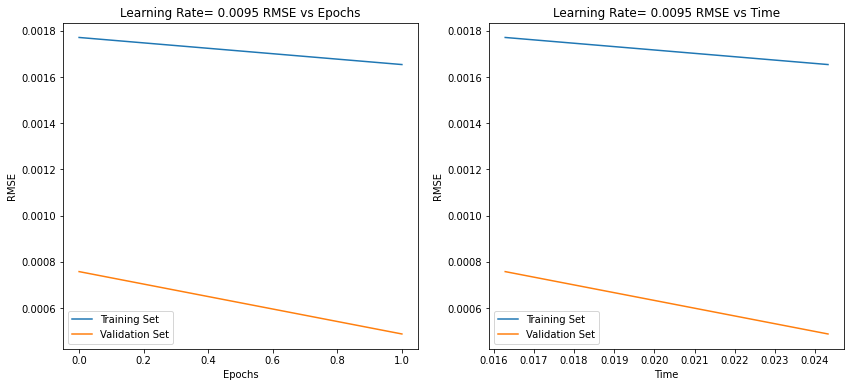

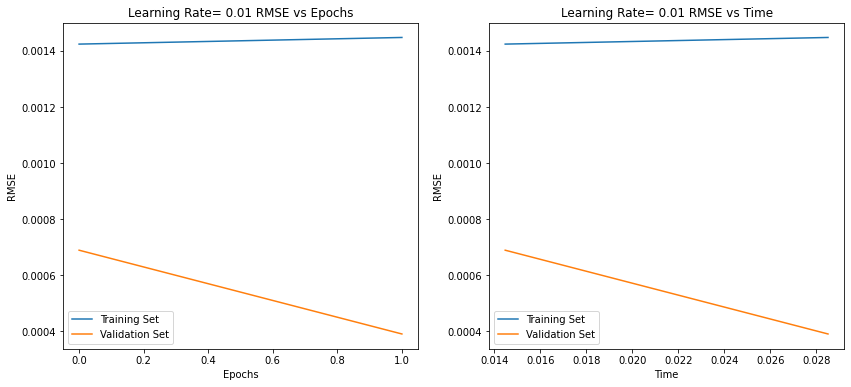

In [ ]:
learning_rates = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.0085, 0.009, 0.0095, 0.01]
batch_size = best_batch_size
training_times_lr = []

RMSE_Array_Train = []
RMSE_Array_Val = []
Time_Epochs = []

for lr in learning_rates:

    w, rmse_array_train, rmse_array_val, time_epochs = mini_batch_gradient_descent(X_train=X_train_normalized , y_train=y_train , X_val=X_val_normalized , y_val=y_val , batch_size=batch_size , lr=lr, ct=1.001*rmse_val_direct)

    RMSE_Array_Train.append(rmse_array_train)
    RMSE_Array_Val.append(rmse_array_val)
    Time_Epochs.append(time_epochs)

    if(len(time_epochs)>1): #Not plotting for convergence in one epoch
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
            
        axs[0].plot(rmse_array_train, label = "Training Set")
        axs[0].plot(rmse_array_val, label = "Validation Set")
        axs[0].set(xlabel='Epochs', ylabel='RMSE')
        axs[0].legend()
        title = 'Learning Rate= '+str(lr)+' RMSE vs Epochs'
        axs[0].set_title(title)

        axs[1].plot(time_epochs, rmse_array_train, label = "Training Set")
        axs[1].plot(time_epochs, rmse_array_val, label = "Validation Set")
        axs[1].set(xlabel='Time', ylabel='RMSE')
        axs[1].legend()
        title = 'Learning Rate= '+str(lr)+' RMSE vs Time'
        axs[1].set_title(title)

        plt.show()

    training_times_lr.append(time_epochs[-1])

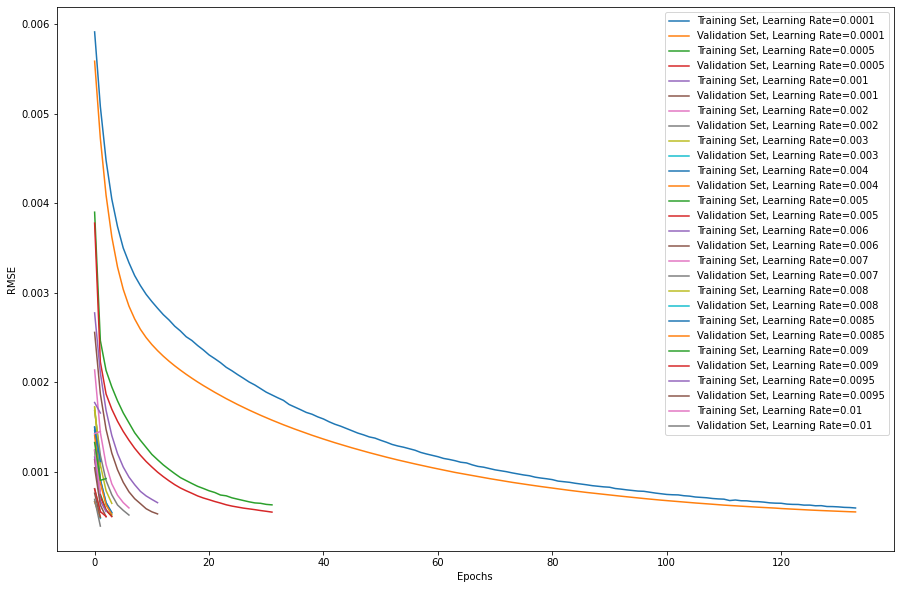

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(RMSE_Array_Train)):
    plt.plot(RMSE_Array_Train[i], label='Training Set, Learning Rate='+str(learning_rates[i]))
    plt.plot(RMSE_Array_Val[i], label = 'Validation Set, Learning Rate='+str(learning_rates[i]))
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

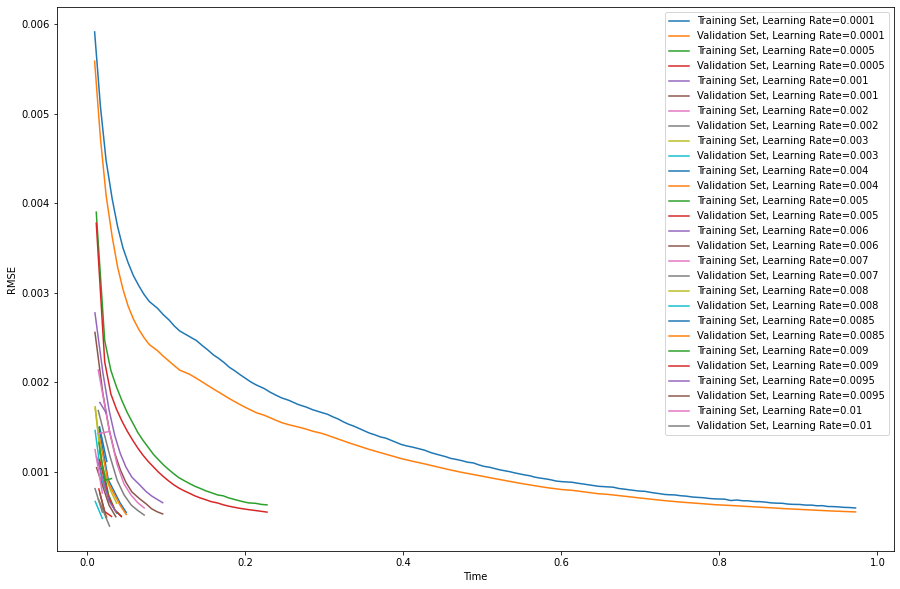

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(RMSE_Array_Train)):
    plt.plot(Time_Epochs[i],RMSE_Array_Train[i], label='Training Set, Learning Rate='+str(learning_rates[i]))
    plt.plot(Time_Epochs[i],RMSE_Array_Val[i], label = 'Validation Set, Learning Rate='+str(learning_rates[i]))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Describe your findings, including the main takeaways from each of your plots. [0.5]**

The graphs are plotted for batch_size=64

For small values of learning rate, the RMSE values converge gradually, and require more number of epochs and more training time.

For larger values of learning rate, the RMSE values converge quickly in less time and less number of epochs.

## Part 6 - Finalizing a model [2 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[1]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[1]** 

**Briefly describe your model selections/settings. [1]**

To select the model, we already have the best value for batch size used in 5.2 (best_batch_size)

Now, we find the learning rate that takes least training time on this batch_size

This model takes the least time for convergence

In [ ]:
### YOUR CODE HERE ###

#To select the model, we already have the best value for batch size used in 5.2 (best_batch_size)
#Now, we find the learning rate that takes least training time on this batch_size

minimum_time_lr = np.Infinity
best_lr = -1

for i in range(len(learning_rates)):
    if(training_times_lr[i] < minimum_time_lr):
        minimum_time_lr = training_times_lr[i]
        best_lr = learning_rates[i]

print("Best model with least time for convergence =",minimum_time_lr,"\b, has batch size=",best_batch_size,"and learning rate =",best_lr)

Best model with least time for convergence = 0.019441604614257812 , has batch size= 64 and learning rate = 0.008


**Summarize the performance of your model for the task of managing ailerons of an aircraft. [1]**

For this task, I have chosen the model with best_batch_size and best_lr, and used its weights to evaluate on the test set.

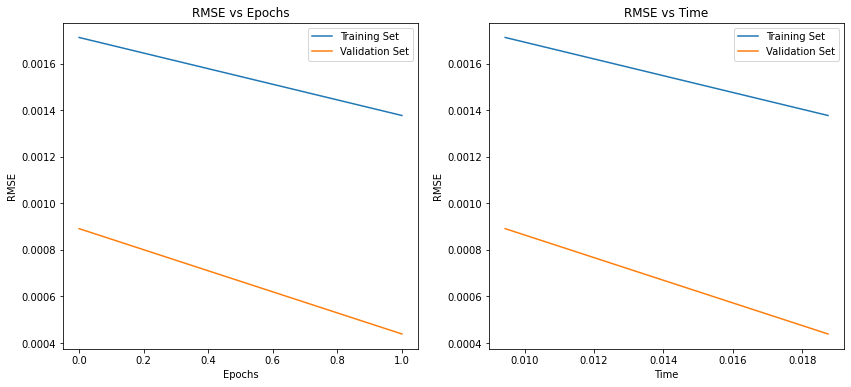

RMSE of best model on Test set = 0.0014322553967827689


In [ ]:
w, rmse_array_train, rmse_array_val, time_epochs = mini_batch_gradient_descent(X_train=X_train_normalized , y_train=y_train , X_val=X_val_normalized , y_val=y_val , batch_size=best_batch_size , lr=best_lr, ct=1.001*rmse_val_direct)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
            
axs[0].plot(rmse_array_train, label = "Training Set")
axs[0].plot(rmse_array_val, label = "Validation Set")
axs[0].set(xlabel='Epochs', ylabel='RMSE')
axs[0].legend()
axs[0].set_title('RMSE vs Epochs')

axs[1].plot(time_epochs, rmse_array_train, label = "Training Set")
axs[1].plot(time_epochs, rmse_array_val, label = "Validation Set")
axs[1].set(xlabel='Time', ylabel='RMSE')
axs[1].legend()
axs[1].set_title('RMSE vs Time')


plt.show()


y_pred_test = np.dot(X_test_normalized, w.T).reshape(-1,1)

rmse_test = np.sqrt(mean_squared_error(y_pred_test,y_test))

print("RMSE of best model on Test set =",rmse_test)